# Fitting simple models on data

## TOC
* [fitting a simple (linear) model on data](#fit)

<a id="fit"></a>
## Fitting a simple, linear model on data

Position of the problem. 

We have 
* experimental data: $(x_i, y_i, \sigma_i)$
* a model: $f(x,\vec{\theta})$ which is supposed to describe the data, and depends on unknown parameters $\vec{\theta}$.

We want to find the function that describes best the data. The least square prescription is to minimize the sum of the squares of the residuals, weighted by the measurement uncertainties: 
$$
\chi^2 = \sum_i  w_i \left(y_i - f(x_i, \vec{\theta})\right)^2
$$
with $w_i = \frac{1}{\sigma_i^2}$ So, to find the best fit, in the sense of least squares, one needs to find the value of $\vec{\theta}$ that minimizes the $\chi^2$ defined above. 


## Linear models
If the model $f$ is a linear function of the $\vec{\theta}$ parameters, then, this minimization is actually very simple, and may be performed in one single step. By linear function of the parameters, we mean that $f$ may be written as:
$$
f(x,\vec{\theta}) = \sum_k \theta_k g_k(x)
$$
(example: a polynomial, a trigonometric series, ...)

In that case, the $\chi^2$ may be written as:
$$
\chi^2 = \sum_i w_i \left(y_i - \sum_k \theta_k g_k(x)\right)^2
$$
at the minimum of $\chi^2$, we have $\nabla\chi^2 = \vec{0}$, or 
$$
\forall p\ \ \ \frac{1}{2}\frac{\partial\chi^2}{\partial\theta_p} = \sum_i w_i\left(y_i - \sum_k \theta_k g_k(x_i)\right) \left(-g_p(x_i)\right) = 0
$$
We can show that it boils down to solving the linear equation:
$$
\mathbf{A} \vec{\theta} = \mathbf{B}
$$
where 
$$
A_{pq} = \sum_i w_i g_p(x_i) g_l(x_j)\ \ \ B_p = \sum_i w_i y_i g_p(x_i)
$$
So, to find the best fit function, all we have to do is to form the $A$ and $B$ matrices, and to solve the system. This is generally easy and fast. 

## Non-linear models
Example: $f(x; m,\sigma) = \exp -\frac{1}{2} \left(\frac{x-m}{\sigma}\right)^2$, $f(x) = \cos \omega x$... 

The situation is more complicated, as the $\chi^2$ is no longer a quadratic function of the parameters. In that case, we use iterative methods. The fastest ones are those where we can rely on an estimate of the second derivatives of the $\chi^2$. A common approach is to (1) pick a starting point (hopefully not too far from the minimum (2) linearize the model around that starting point (3) minimize the quadratic $\chi^2$ that results from the model linearization (4) move to the minimum and iterate. 

## A practical example
### generating data

In [46]:
# let's create some data 
# it corresponds to a series of measurements of some linear law
x = np.random.uniform(-3., 10., size=100)
y = 2. * x + 1.1

# we should add noise
# data points are affected by different uncertainties
yerr = np.random.uniform(0.2, 1., size=100)
# and we generate gaussian noise, following these uncertainties
n = np.random.normal(scale=yerr, size=100)
y += n

### finding the solution in one step

In [49]:
# here, we use what we have learnt above
# to show that linear fits boil down to a linear algebra problem
import numpy.linalg as linalg

J = np.array([x, np.ones(len(x))]).T
W = np.diag(1. / yerr**2)
A = np.dot(J.T, W).dot(J)
B = np.dot(J.T, W).dot(y)
print J.shape, A.shape, B.shape, type(W)
p = linalg.solve(A, B)

(100, 2) (2, 2) (2,) <type 'numpy.ndarray'>


### and plotting the results

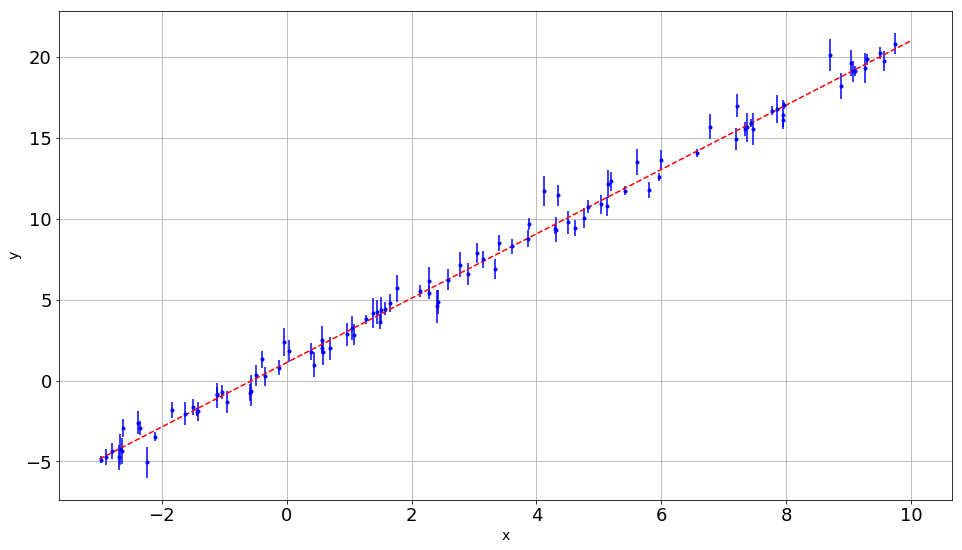

In [50]:
import pylab as pl
pl.rcParams.update({'font.size': 18})

pl.figure(figsize=(16,9))
pl.errorbar(x, y, yerr=yerr, ls='', color='b', marker='.')
pl.xlabel('x', fontsize=14)
pl.ylabel('y', fontsize=14)

xx = np.linspace(-3., 10., 100)
pl.plot(xx, p[0] * xx + p[1], 'r--')
pl.grid(1)

## scipy and numpy have functions that do all that for you

Let's see some examples. The numpy.polyfit function allows one to fit a polynomial on data:


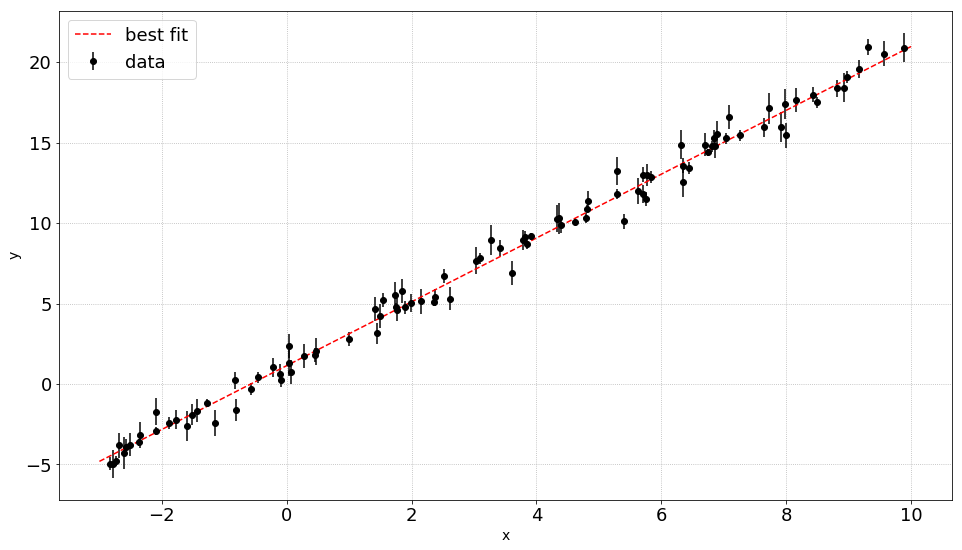

In [17]:
r = np.polyfit(x,y, deg=1)

# it is always better to add some weights
w = 1. / yerr**2
r = np.polyfit(x, y, deg=1, w=w)

pl.figure(figsize=(16,9))
xx = np.linspace(-3., 10., 100)
pl.errorbar(x, y, yerr=yerr, ls='', marker='o', color='k', label='data')
pl.plot(xx, np.polyval(r, xx), 'r--', label='best fit')
pl.xlabel('x', fontsize=14)
pl.ylabel('y', fontsize=14)
pl.legend(loc='upper left')
pl.grid(1, ls=':')

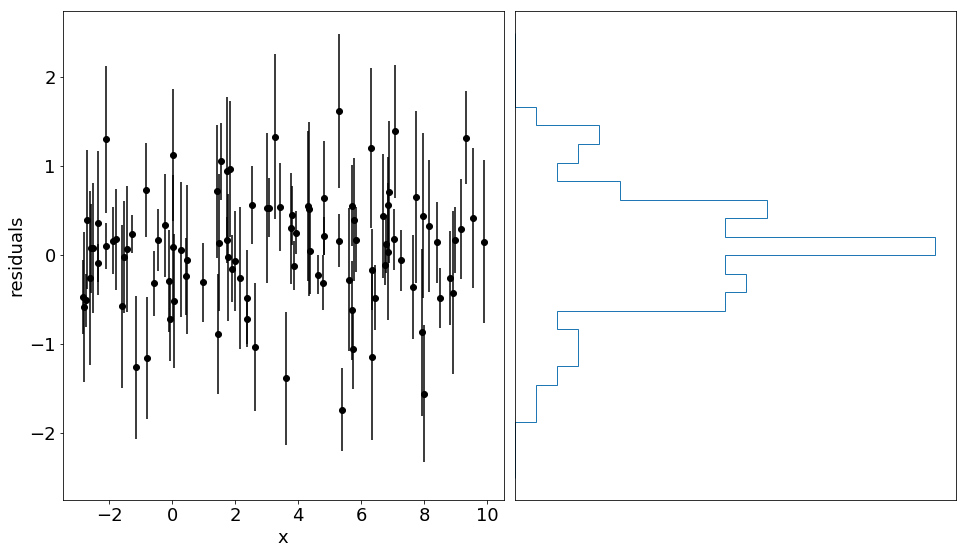

In [33]:
# Residuals:

pl.figure(figsize=(16,9))
ax = pl.subplot(121)
pl.errorbar(x, y-np.polyval(r,x), yerr=yerr, marker='o', ls='', color='k')
pl.ylabel('residuals')
pl.xlabel('x')

ax2 = pl.subplot(122, sharey=ax)
_ = pl.hist( y-np.polyval(r,x), bins=np.linspace(-2.5,2.5,25), histtype='step', orientation='horizontal')
ax2.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
pl.subplots_adjust(wspace=0.025)

## Another example

In [35]:
import scipy.optimize as optimize

# the model
def f(p, x):
    return p[0] * x + p[1]

# the function that computes the weighted residuals
def errfunc(p,x, y, err):
    return (f(p,x) - y) / err

# an initial state
p0 = np.zeros(2)
p0[0], p0[1] = 0.1, 0.1

# minimize
p, success = optimize.leastsq(errfunc, p0, args=(x,y,yerr))
print p, success

[1.98961796 1.12568406] 1


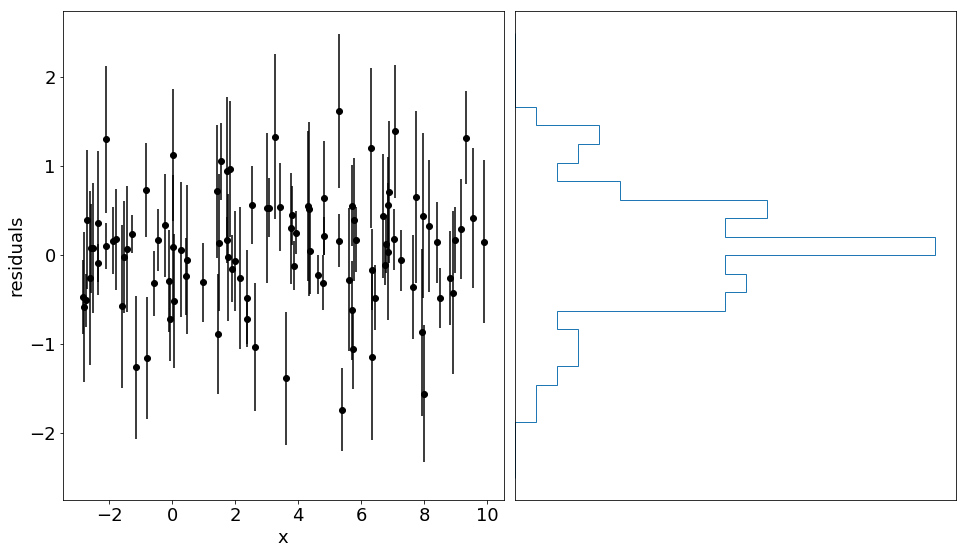

In [44]:
# Residuals:

pl.figure(figsize=(16,9))
ax = pl.subplot(121)
pl.errorbar(x, y-np.polyval(r,x), yerr=yerr, marker='o', ls='', color='k')
pl.ylabel('residuals')
pl.xlabel('x')

ax2 = pl.subplot(122, sharey=ax)
_ = pl.hist( y-np.polyval(r,x), bins=np.linspace(-2.5,2.5,25), histtype='step', orientation='horizontal')
ax2.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
pl.subplots_adjust(wspace=0.025)

In [45]:
# the pulls
residuals = y-np.polyval(r,x)
chi2 = ((residuals / yerr)**2).sum()
ndof = len(residuals) - 2
reduced_chi2 = chi2 / ndof
print("Chi2=%f  Reduced Chi2=%f" % (chi2, reduced_chi2))

Chi2=120.395973  Reduced Chi2=1.228530


## Exercice

Let's define a family of functions:
$$
f(x; a, b, \omega) = a \cos(\omega x) + b \sin(1.72 \omega x)
$$

We first assume that $\omega$ is known; $\omega = 1.23$ (not fitted)
* generate noisy data with some value of parameters $a$ and $b$
* represent plot that data in a nice way
* fit the model above and retrieve the values of a and b

We then assume that $\omega$ is not know (we know it is around one)
* same as last question, but this time, we fit for $\omega$ (use optimize.leastsq)

<ErrorbarContainer object of 3 artists>

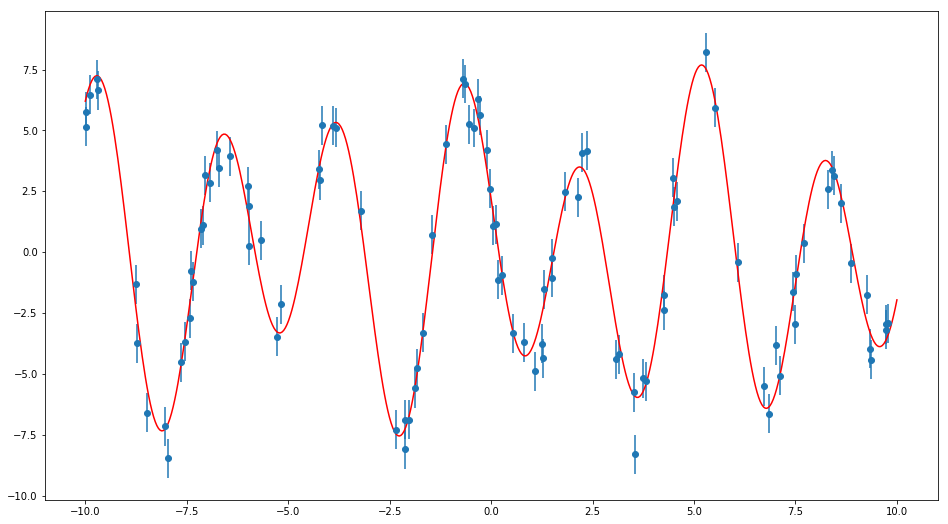

In [5]:
def wave(x, a, b, omega):
    return a * np.cos(omega*x) + b * np.sin(1.72*omega*x)

a, b, omega = 2.2, -5.5, 1.23

pl.figure(figsize=(16,9))
x = np.linspace(-10.,10.,500)
pl.plot(x, wave(x,a,b,omega), 'r-')

x = np.random.uniform(-10., 10, 100)
y = wave(x,a,b,omega)
yerr=np.ones(len(x)) * 0.8
n = np.random.normal(scale=yerr, size=100)
y += n
pl.errorbar(x,y,yerr=yerr, marker='o',ls='')

In [13]:
from scipy import optimize

def errfunc(p, x, y, err):
    return (y - wave(x, p[0], p[1], 1.23)) / err
    
p0 = [0.1, 0.1]
p, success = optimize.leastsq(errfunc, p0, args=(x, y, yerr))
print p, success

[ 2.28165783 -5.40088531] 1


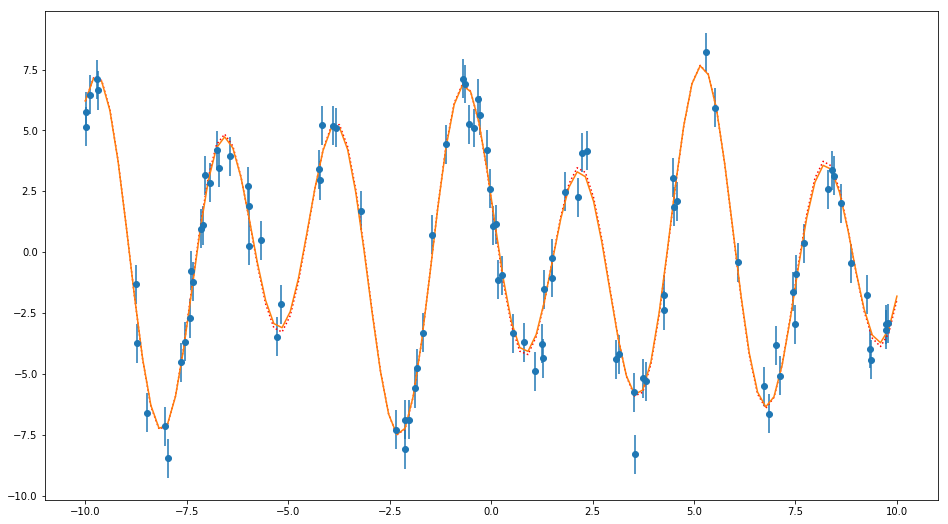

In [16]:
pl.figure(figsize=(16,9))
pl.errorbar(x,y,yerr=yerr, marker='o',ls='')
xx = np.linspace(-10, 10., 100)
pl.plot(xx, wave(xx, a=2.2, b=-5.5, omega=1.23), ls=':', color='r')
pl.plot(xx, wave(xx, a=p[0], b=p[1], omega=1.23))

Non linear fit

In [20]:
def errfunc(p, x, y, err):
    return (y - wave(x, p[0], p[1], p[2])) / err
    
p0 = [0.1, 0.1, 1.5]
p, success = optimize.leastsq(errfunc, p0, args=(x, y, yerr))
print p, success

[ 2.27935338 -5.40383455  1.23027708] 1


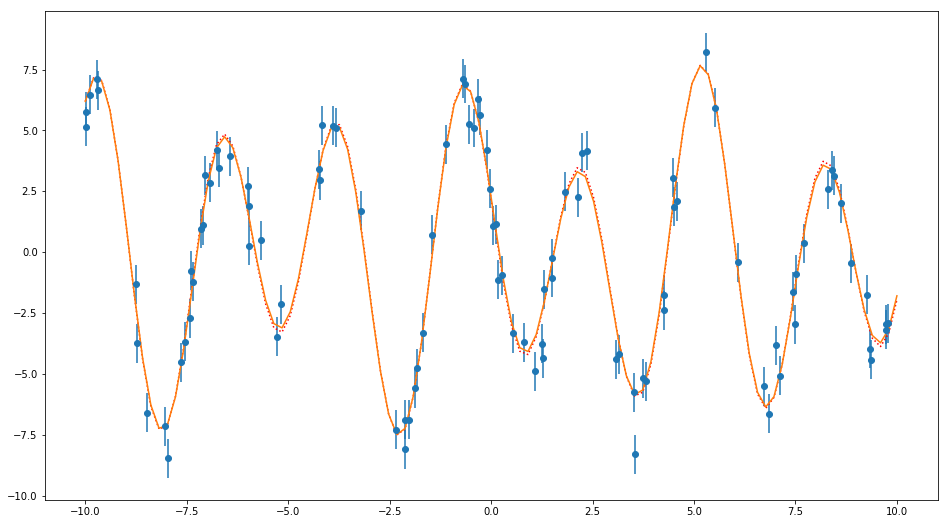

In [23]:
pl.figure(figsize=(16,9))
xx = np.linspace(-10, 10., 100)
pl.errorbar(x,y,yerr=yerr, marker='o',ls='')
pl.plot(xx, wave(xx, a=2.2, b=-5.5, omega=1.23), ls=':', color='r')
pl.plot(xx, wave(xx, a=p[0], b=p[1], omega=p[2]))